In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit


def jerk_model( time_step, a0, a1, a2):
    return a0 * ( ( time_step - a1)**2 ) * ( (time_step - a2)**2 ) 


In [63]:
nb_time_steps = 100
time_step = np.arange( nb_time_steps ) #30 time steps
speed = np.round( 100* norm.pdf(time_step,30,6) + 2*np.random.rand( nb_time_steps ) , 2)
threshold = 3 #3cm/s
index_start_movement = np.where(speed > threshold )[0][0] #speed >3
    
index_low_speed = np.where( speed < threshold )[0]

index = np.where( index_low_speed > index_start_movement )[0][0]
index_stop_movement = index_low_speed[ index ]

print( " ========= Observed speed (whole movement) ======== ")
print( speed )
print( "movement start: ", index_start_movement, ", movement stop: ", index_stop_movement, ", movement duration:", time_step[index_stop_movement] - time_step[index_start_movement] )
##############################
# MODEL FITTING
##############################
window = 20
input_data = speed[index_start_movement: index_start_movement + window ]
print("==== observed data used to make the prediction: (window=",window,")")
print( input_data )
print("model fitting.... ")
init_vals = [0.1,0.1,0.1]
best_vals, covar = curve_fit( jerk_model, np.arange( window ), input_data, p0 = init_vals )
print( "best parameters: ", best_vals )
#print(covar)
#############################
# MODEL SIMULATION
#############################
print( "model simulation...")
time_step = np.arange(100)
simulated_speed = jerk_model(time_step, best_vals[0], best_vals[1], best_vals[2])
index_predicted_stop_movement = np.where(simulated_speed < threshold ) [0][0]
print("Predicted Movement duration:", index_predicted_stop_movement )
print("Observed Movement duration:", time_step[index_stop_movement] - time_step[index_start_movement])

 ========= Observed speed (whole movement) ======== 
[0.72 0.55 0.49 0.65 1.47 0.66 1.19 0.66 1.08 0.62 2.02 0.59 2.01 1.65
 0.83 1.9  0.49 1.4  1.32 2.84 2.05 2.94 3.29 3.46 5.19 4.93 5.76 5.89
 8.26 8.06 8.19 6.89 8.01 6.44 5.62 5.83 5.92 3.75 3.35 3.29 1.82 2.41
 1.61 2.5  1.64 1.41 0.79 1.5  0.43 0.46 1.8  1.08 0.13 0.41 0.84 0.15
 0.81 1.43 1.79 1.38 0.97 0.66 2.   1.01 0.45 1.55 1.44 1.09 1.   1.75
 1.17 1.78 0.11 0.01 1.12 0.12 1.3  1.3  0.13 1.01 1.09 1.71 0.64 0.24
 0.43 0.65 1.72 1.48 1.65 0.32 0.38 0.87 1.88 0.48 0.01 0.69 0.04 1.22
 0.55 0.98]
movement start:  22 , movement stop:  40 , movement duration: 18
==== observed data used to make the prediction: (window= 20 )
[3.29 3.46 5.19 4.93 5.76 5.89 8.26 8.06 8.19 6.89 8.01 6.44 5.62 5.83
 5.92 3.75 3.35 3.29 1.82 2.41]
model fitting.... 
best parameters:  [ 1.94274762e-04 -5.65218964e+00  2.23881164e+01]
model simulation...
Predicted Movement duration: 17
Observed Movement duration: 18


In [64]:
import matplotlib.pyplot as plt

In [65]:
len(speed), len(time_step), len(simulated_speed)

(100, 100, 100)

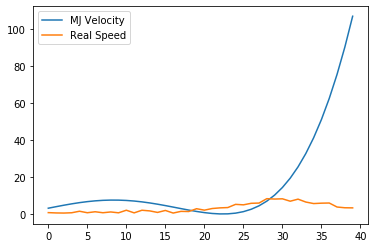

In [66]:
# MJ Velocity
plt.plot(time_step[0:40], simulated_speed[0:40], label = "MJ Velocity")

# REAL
plt.plot(time_step[0:40], speed[0:40], label = "Real Speed")
plt.legend()

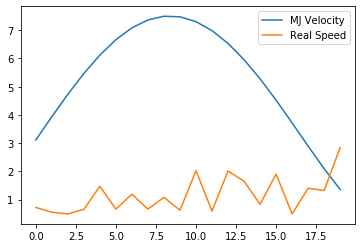

In [67]:
# MJ Velocity
plt.plot(time_step[0:20], simulated_speed[0:20], label = "MJ Velocity")

# REAL
plt.plot(time_step[0:20], speed[0:20], label = "Real Speed")
plt.legend()

In [33]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

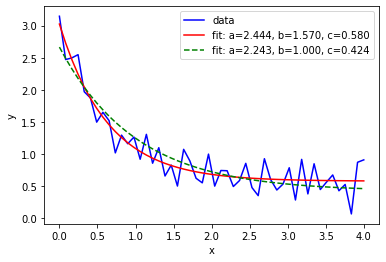

In [46]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
#np.random.seed(1500)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [37]:
popt

array([2.33967352, 1.        , 0.39467556])